<a href="https://colab.research.google.com/github/sushmithanagamuthu/Urban-Air-Quality-and-Health-impact-analysis/blob/main/Urban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer


In [ ]:
# Load the data
df = pd.read_csv('/content/archive.zip')


In [ ]:
# Set display options
pd.set_option('display.max_columns', None)


In [ ]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)


,0
stations,933
preciptype,622
Condition_Code,431
snowdepth,71
sunrise,0
sunriseEpoch,0
sunset,0
sunsetEpoch,0
moonphase,0
conditions,0


In [ ]:
# Basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  windgust           1000 n

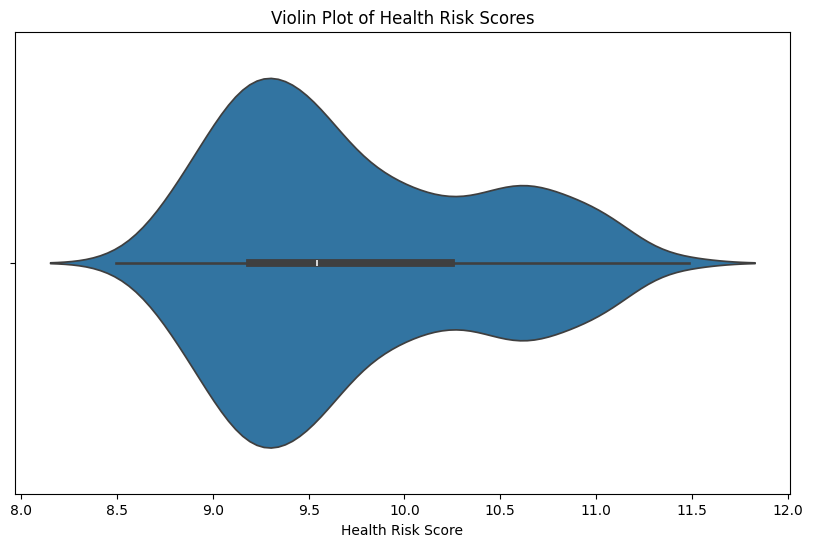

In [ ]:
# Violin plot of Health Risk Scores
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Health_Risk_Score'])
plt.title('Violin Plot of Health Risk Scores')
plt.xlabel('Health Risk Score')
plt.show()


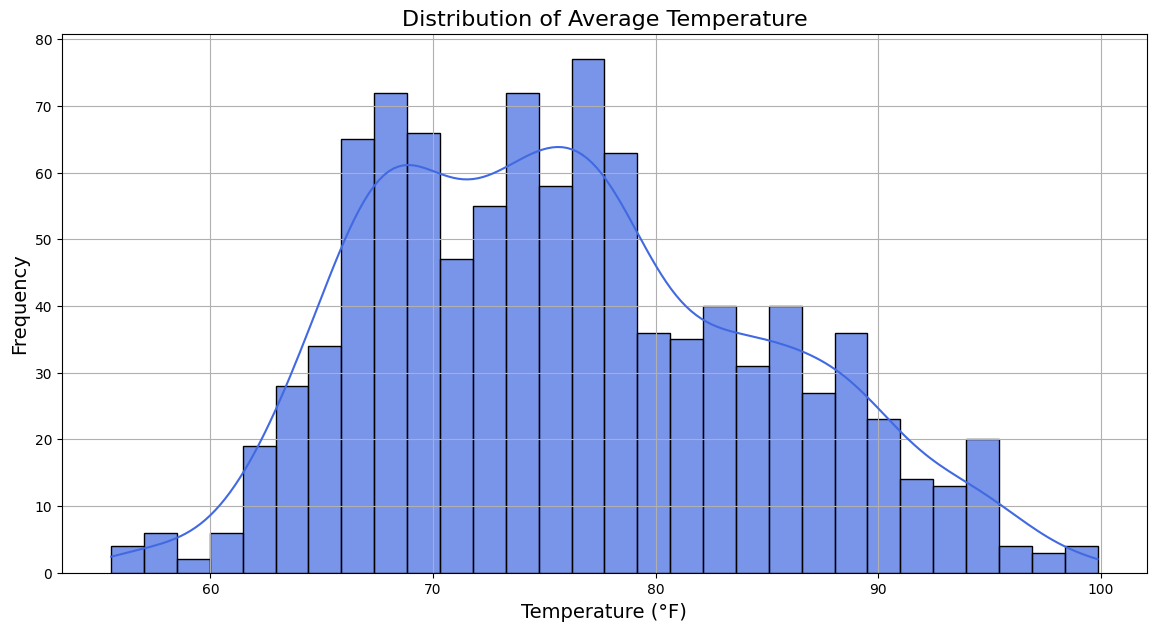

In [ ]:
# Distribution of Average Temperature
plt.figure(figsize=(14, 7))
sns.histplot(df['temp'], bins=30, kde=True, color='royalblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Temperature', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


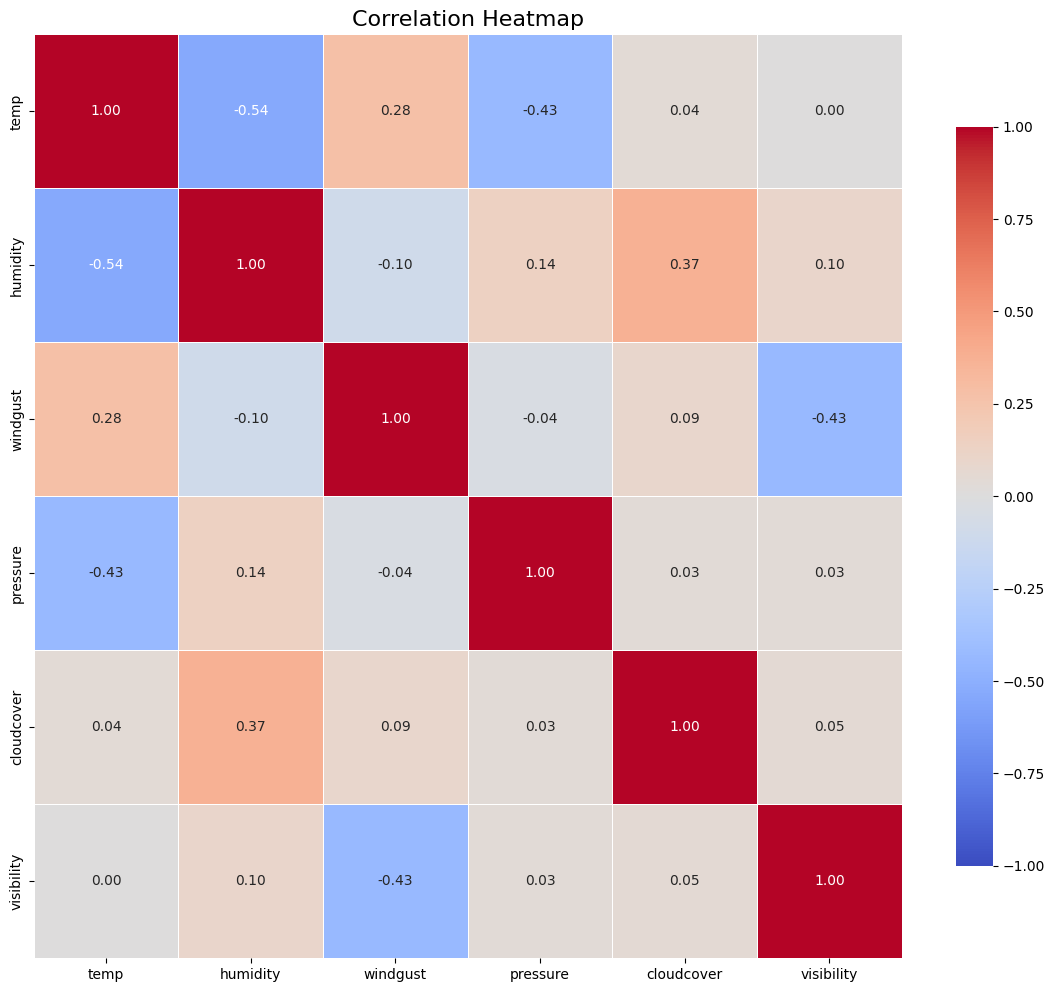

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(14, 12))
corr = df[['temp', 'humidity', 'windgust', 'pressure', 'cloudcover', 'visibility']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [ ]:
# Handling missing values
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)


In [ ]:
# Apply imputer to the dataframe (excluding non-numeric columns)
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)


In [ ]:
# Fill missing values in categorical columns with mode
df_categorical = df.select_dtypes(include=['object', 'category'])


In [ ]:
for col in df_categorical.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df = df.drop(columns=['stations'])


In [ ]:
# Label Encoding for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category'])
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))



In [ ]:
# Split the dataset into features and target
X = df.drop('Health_Risk_Score', axis=1)
y = df['Health_Risk_Score']


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
# Fit the model
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
# Display metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.08055658752214324
Mean Squared Error: 0.018699395890025332
R-squared: 0.9569503890591365


In [ ]:
# Display accuracy as percentage
accuracy = r2 * 100
print(f"Model Accuracy: {accuracy:.1f}%")


Model Accuracy: 95.7%


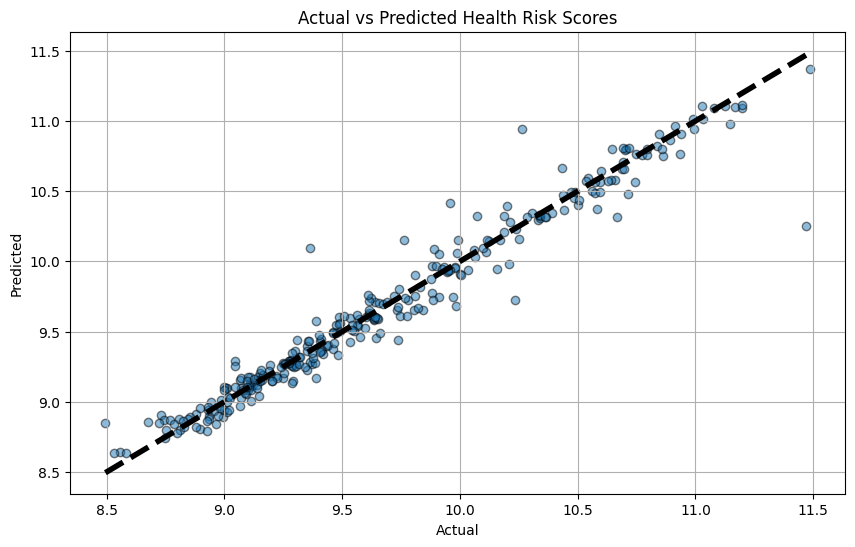

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Health Risk Scores')
plt.grid(True)
plt.show()
